In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date


In [2]:
pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import plotly.express as px

In [4]:
df=pd.read_excel('hotel_bookings.xlsx')

In [5]:
# Printing all the columns
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [6]:
df.shape

(119390, 32)

In [7]:
# Finding the information regarding the null values and datatypes of all the columns in our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
# Finding the count of null values in all the columns of our dataset.
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [10]:
df.drop(['arrival_date_week_number','arrival_date_day_of_month','company','agent','previous_cancellations','previous_bookings_not_canceled','reservation_status_date'], axis=1, inplace=True)

In [11]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2
children,0.0,0.0,0.0,0.0,0.0
babies,0,0,0,0,0


In [12]:
# Finding the count of null values in remaining columns.
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
dtype: int64

In [13]:
df['children'].median()

0.0

In [14]:
#Filling the null values with the median value.
df['children'].fillna(df['children'].median(), inplace=True)

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\1944695489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].median(), inplace=True)


In [15]:
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         0
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
dtype: int64

In [16]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [17]:
df.loc[df['country'] == 'PRT', 'country'].count()

48590

In [18]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\2863300244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [19]:
df.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
dtype: int64

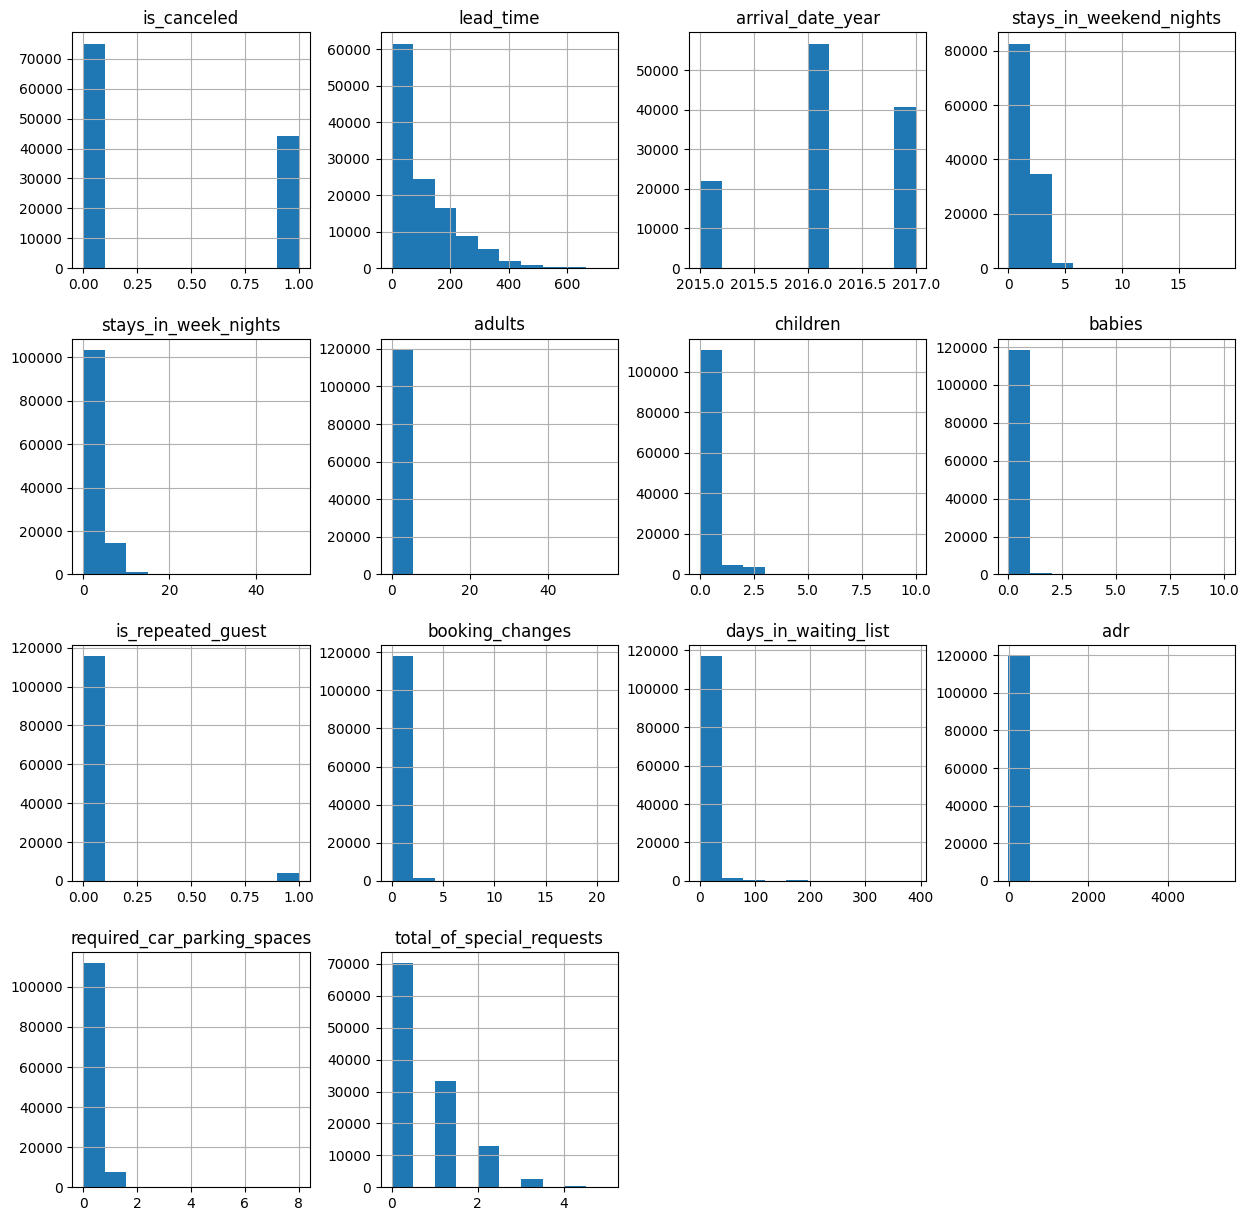

In [20]:
# Plotting a graph to show a histogram for all the columns in the dataset
df.hist(figsize=(15,15))
plt.show()

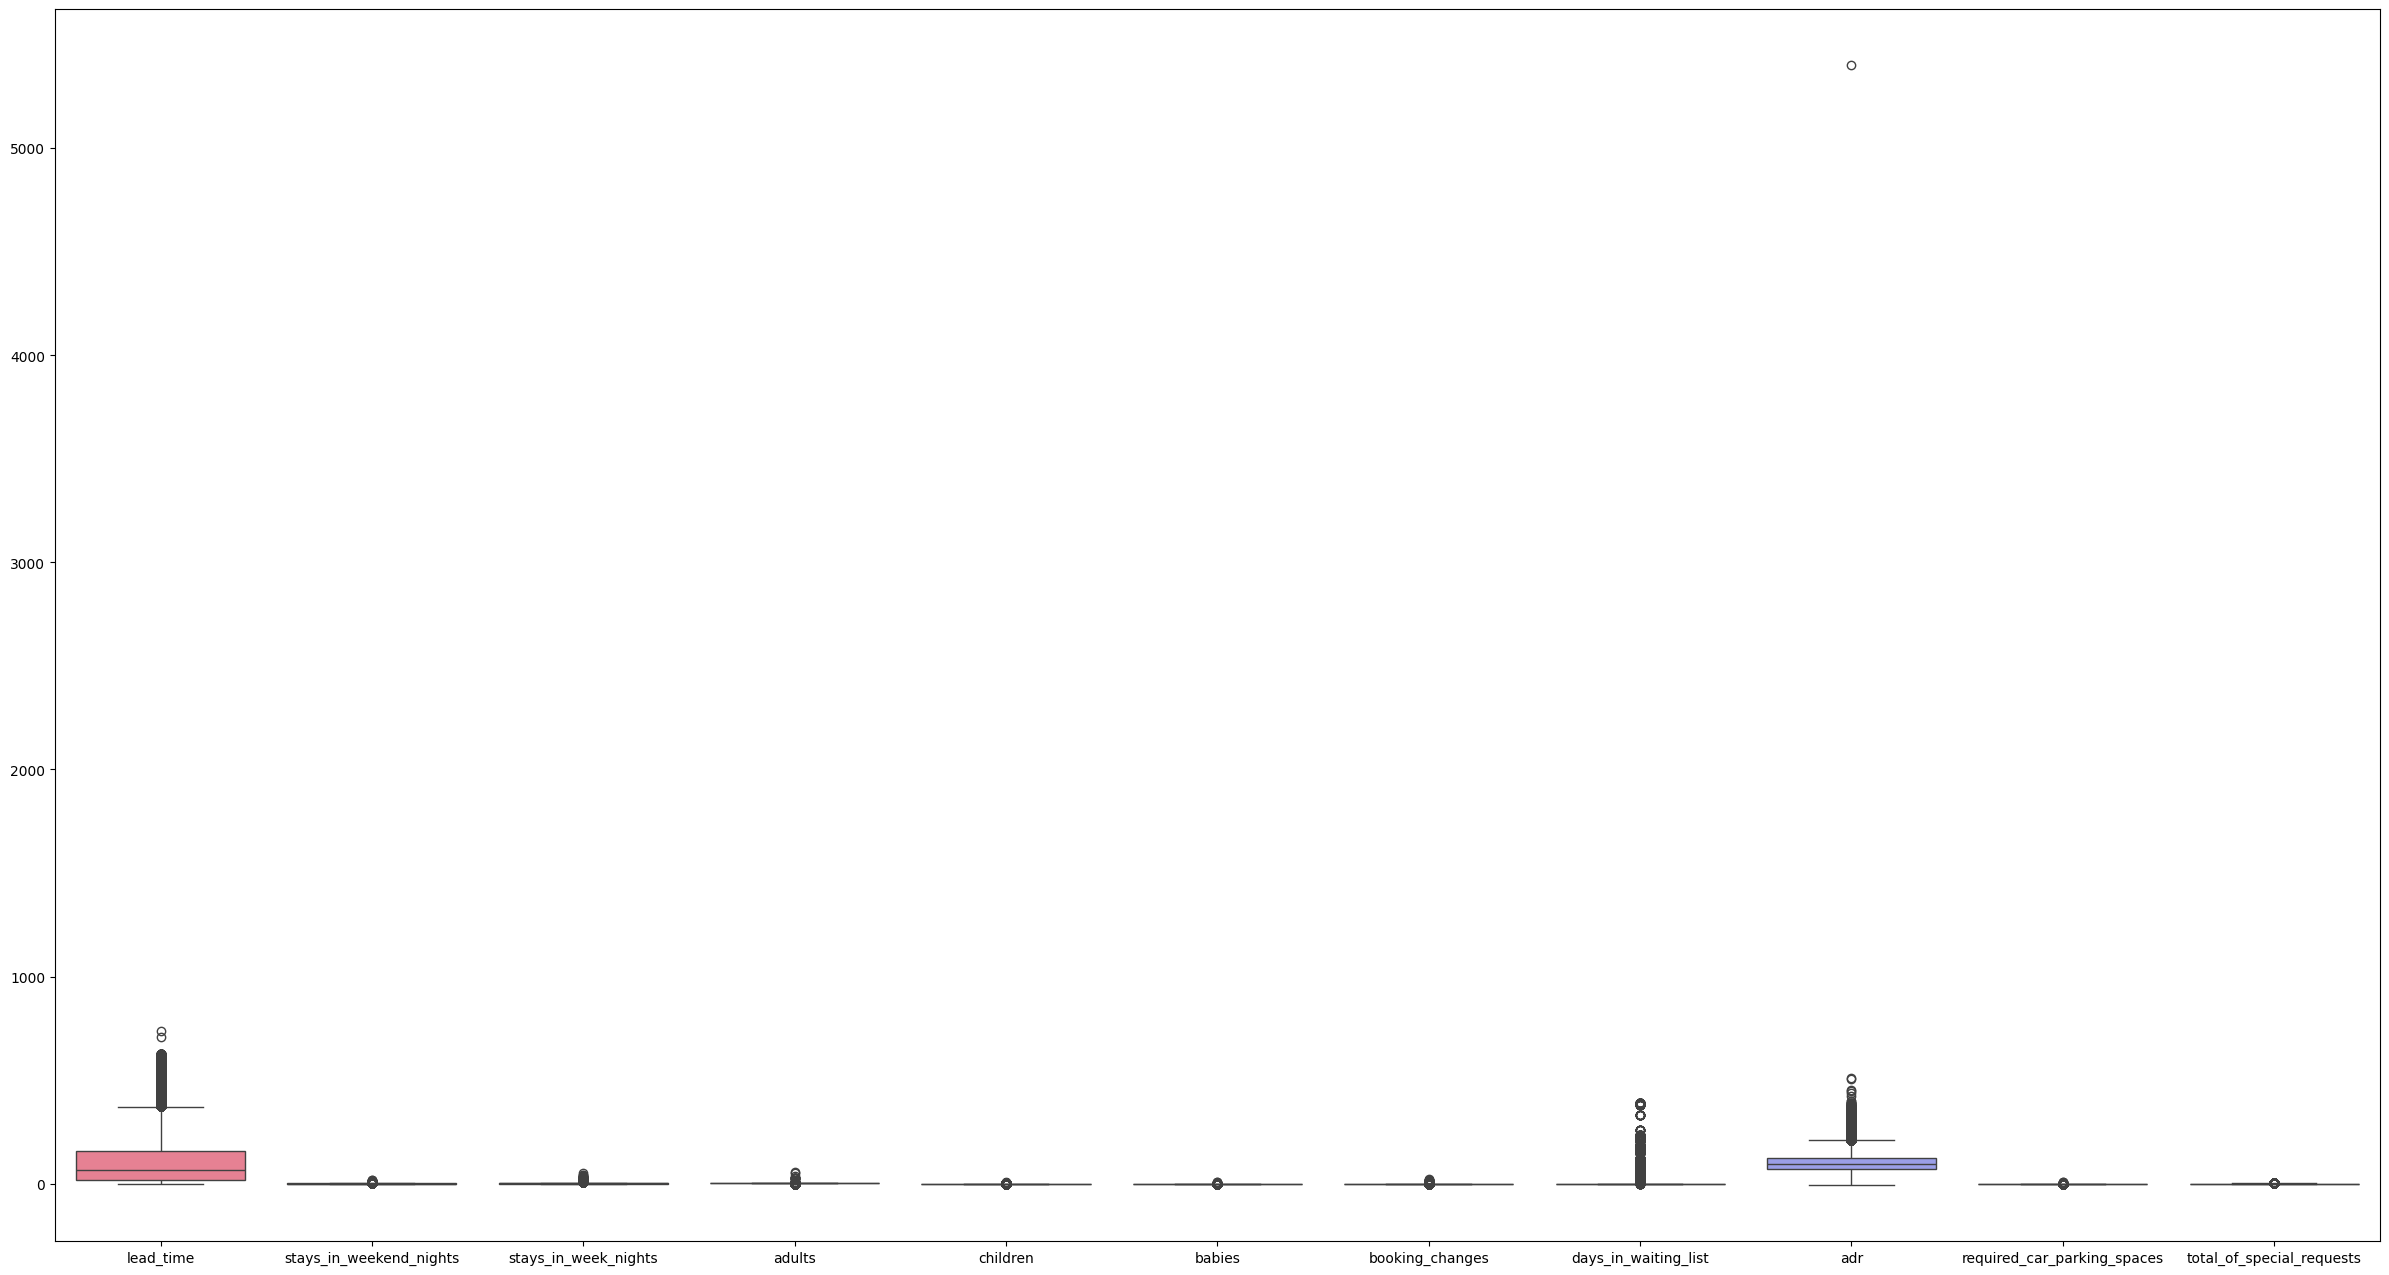

In [21]:
# Plotting a boxplot to find out the outliers in each column
plt.figure(figsize=(30,16))
sns.boxplot(data=df[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']])
plt.show()

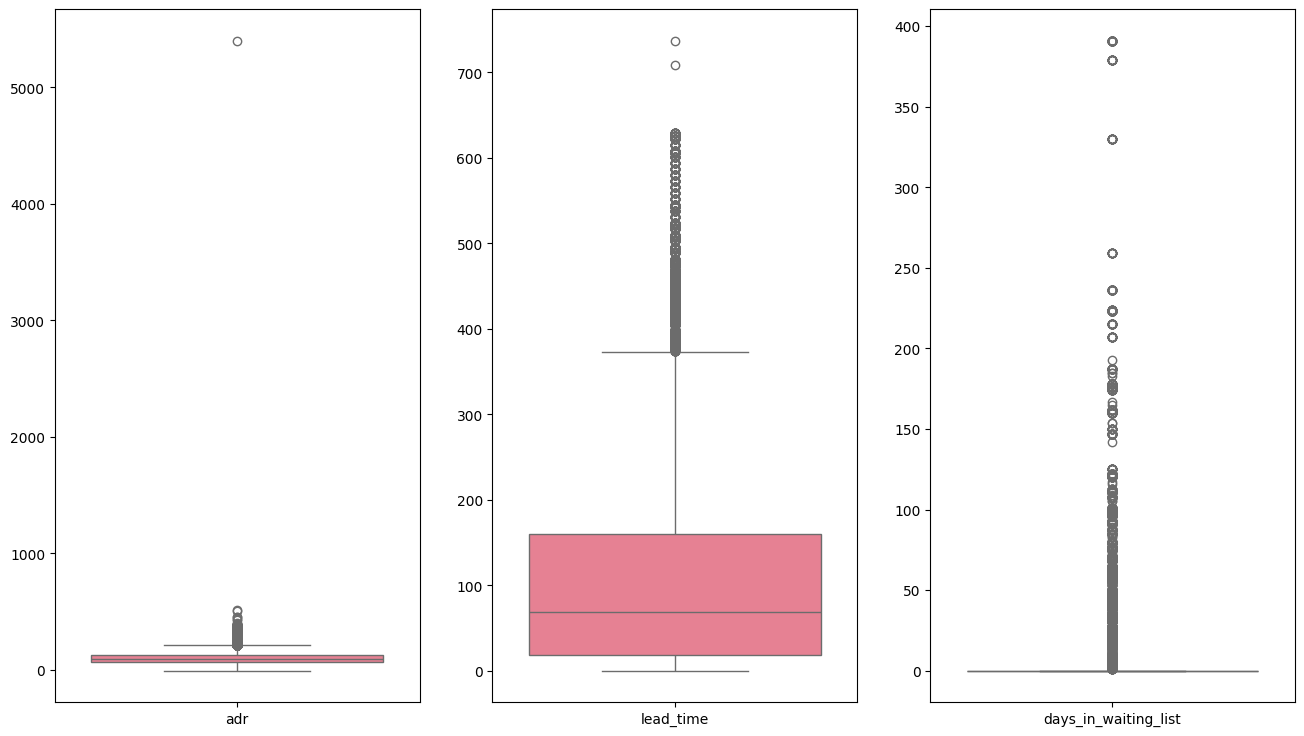

In [22]:
fig, axes=plt.subplots(1,3, figsize=(16,9))
sns.set_palette('husl')
ax= sns.boxplot(data=df[['adr']], ax=axes[0])
ax=sns.boxplot(data=df[['lead_time']], ax=axes[1])
ax= sns.boxplot(data=df[['days_in_waiting_list']], ax=axes[2])
plt.show()

In [23]:
# # First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [24]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [25]:
# Removing outliers in adr column
new_df.drop(new_df[new_df['adr'] > 5000].index, inplace = True)
new_df.drop(new_df[new_df['adr'] <= 0].index, inplace = True)

In [26]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room',
                      'arrival_date_year']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\396139032.py:12: UserWarni

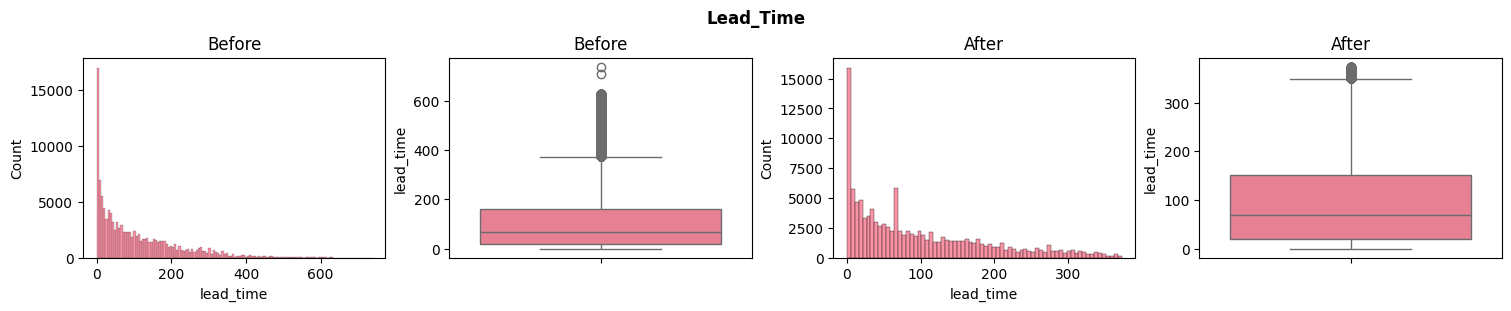

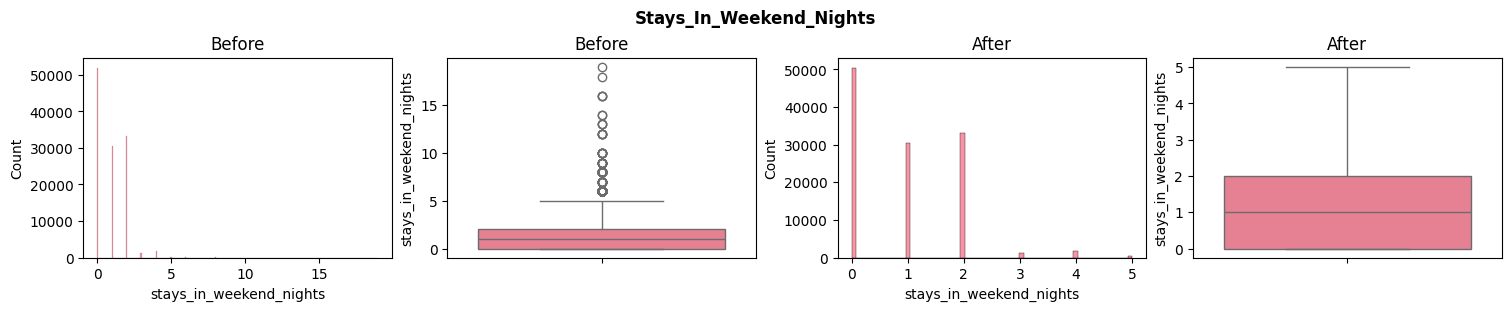

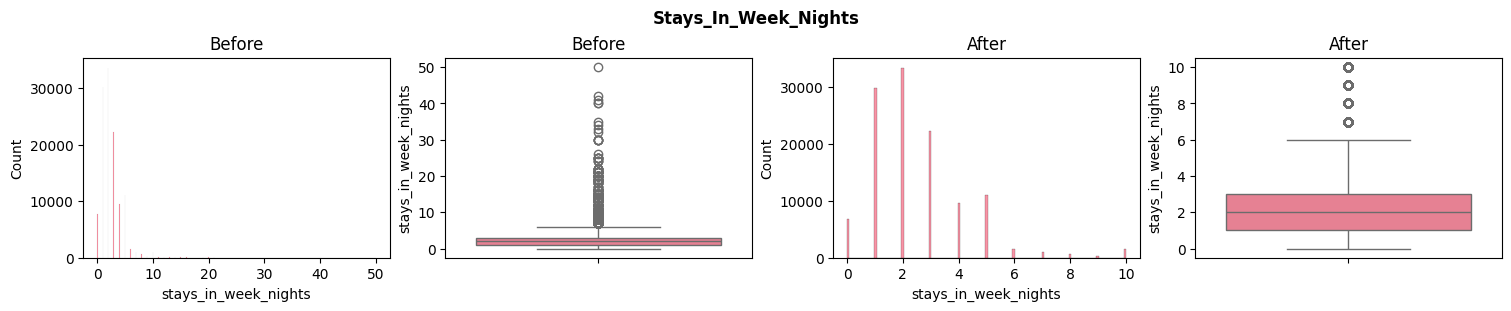

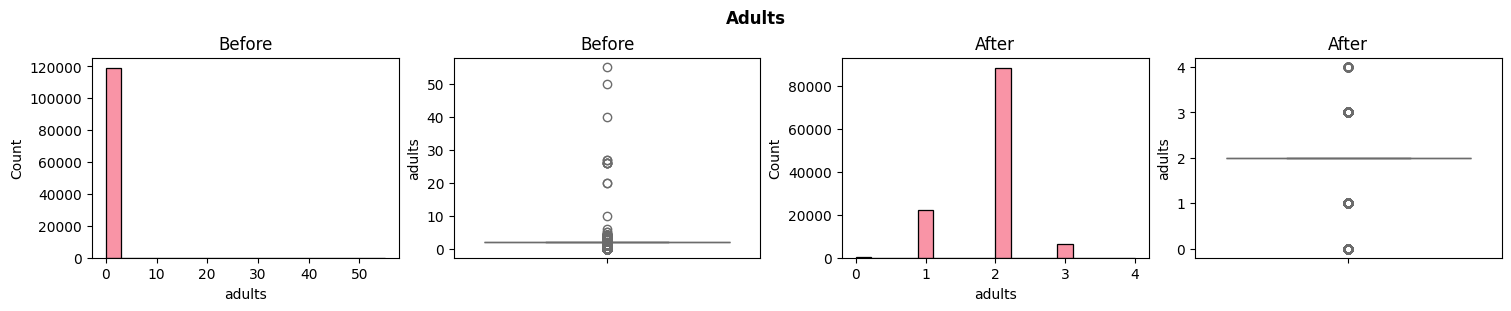

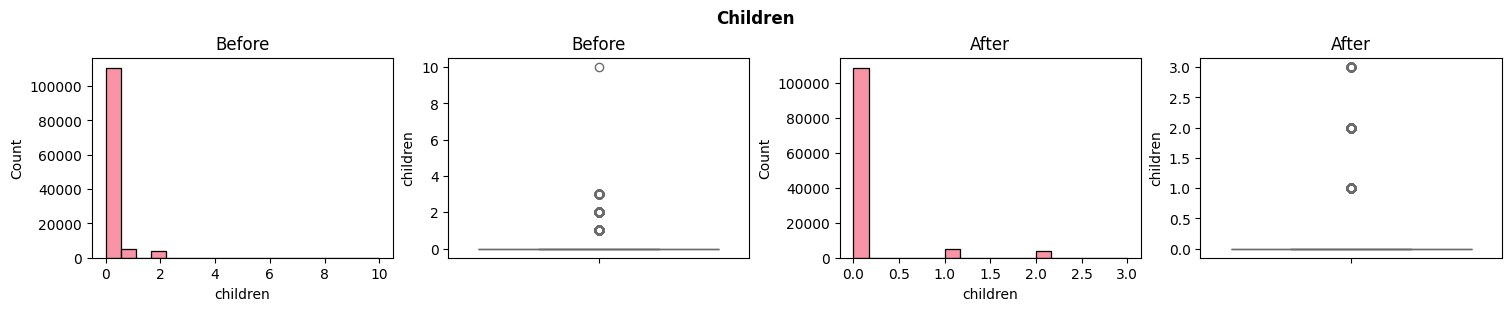

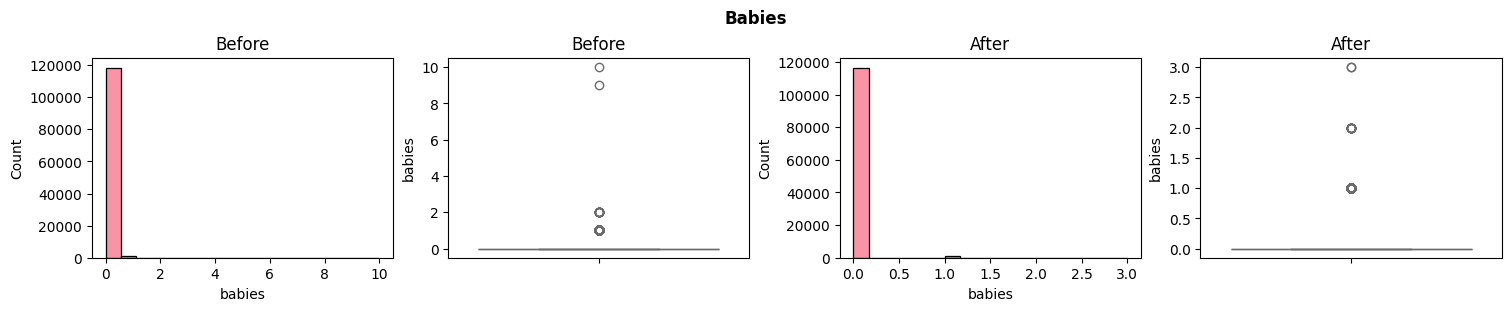

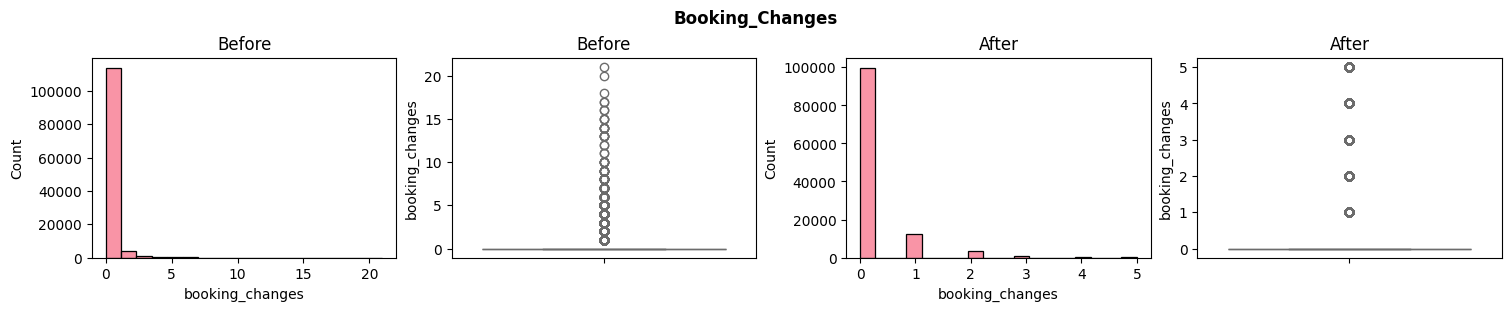

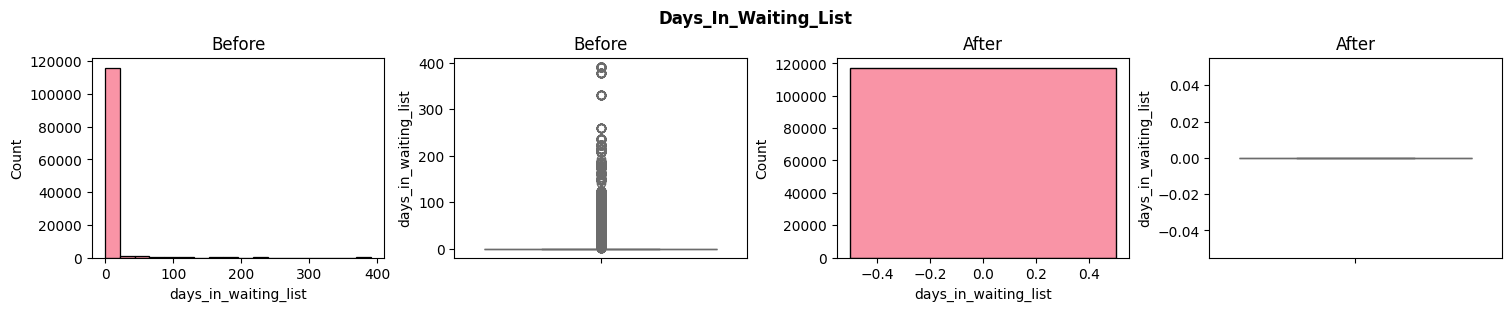

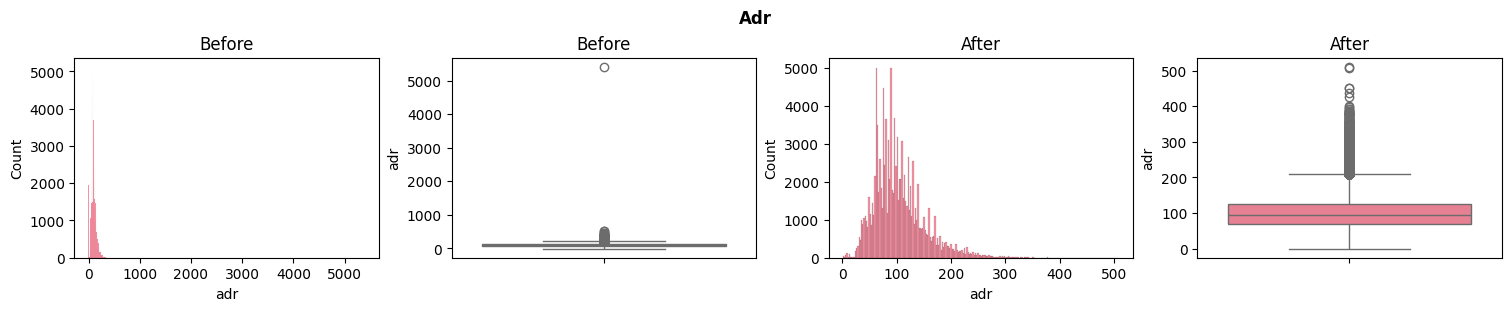

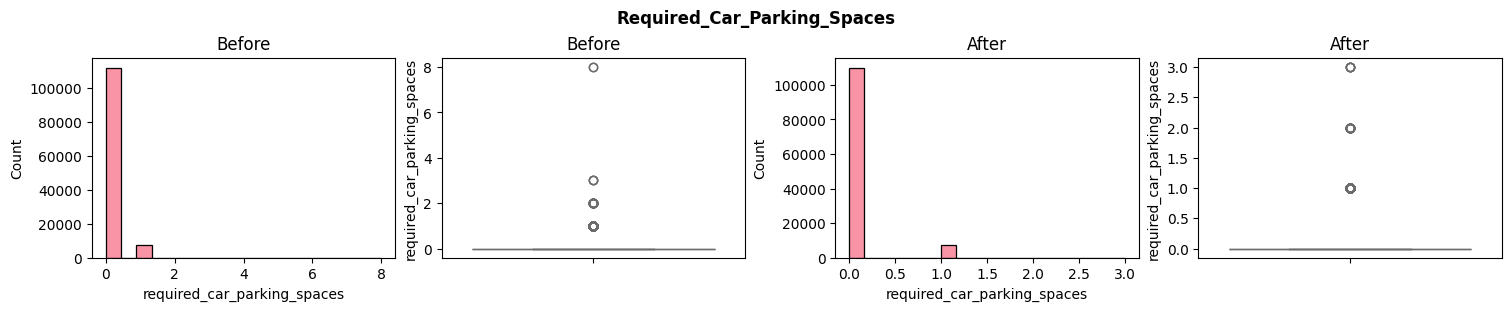

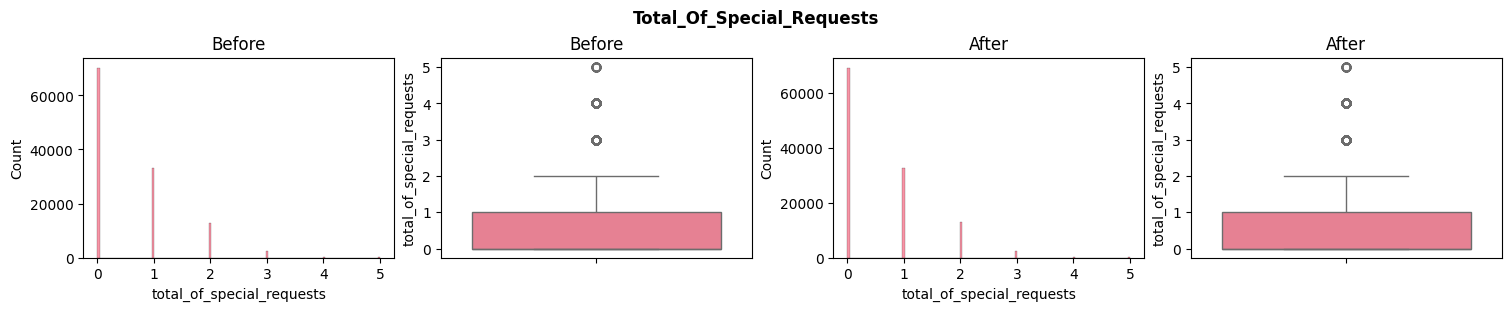

In [27]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")

# After treating outliers
  sns.histplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [28]:
# Making a new column 'kids' joining two columns i.e 'babies' and 'children'.
new_df['kids']=new_df['babies'] + new_df['children']

In [29]:
# Making a new column 'total stays' by adding two columns 'stays_in_week_nights' and 'stays_in_weekend_nights'.
new_df['total_stays']=new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

In [30]:
# Making a new column actual guest based on no cancellation
actual_guests = new_df.loc[new_df["is_canceled"] == 0]
# Now creating a new column revenue by multiply adr with total stays
actual_guests['revenue'] = (actual_guests['adr'] * (actual_guests['total_stays']))/1000000

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\1048837914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_guests['revenue'] = (actual_guests['adr'] * (actual_guests['total_stays']))/1000000


In [31]:
new_df['guest']= new_df['adults']+new_df['children']+new_df['babies']
new_df['guest'] = new_df.guest.map( lambda x: 'Single' if x == 1 else 'Family')
new_df['kids_count'] = new_df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')

In [32]:
# Removing adult count=0 as it is not relevent for our study
new_df.drop(new_df[new_df['adults'] == 0].index, inplace = True)
# Removing total stays=0 as it is not relevent for our study
new_df.drop(new_df[new_df['total_stays'] == 0].index, inplace = True)
# Removing assigned room type=0 as it is not relevent for our study
new_df.drop(new_df[new_df['assigned_room_type'] == 0].index, inplace = True)

Text(0.5, 1.0, '% share of different hotel type ')

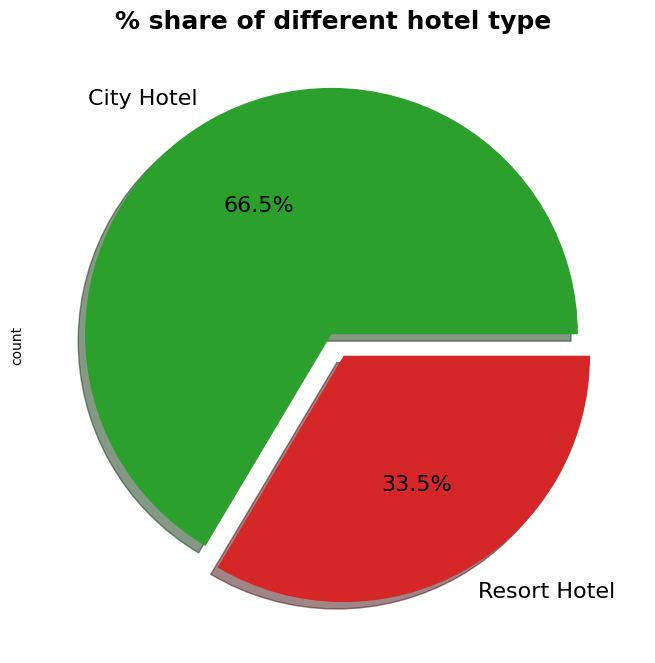

In [33]:
# Visualizing the bookings by pie chart.
ax = new_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=16, colors=['tab:green', 'tab:red'])   
ax.set_title('% share of different hotel type ',fontsize = 18, fontweight='bold')

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\2582292430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(ax=axes[0], data=new_df, x='hotel',palette=['red', 'green'])
C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\2582292430.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[1], x='hotel', y='revenue', data=revenue_hotel,palette=['green', 'red'])


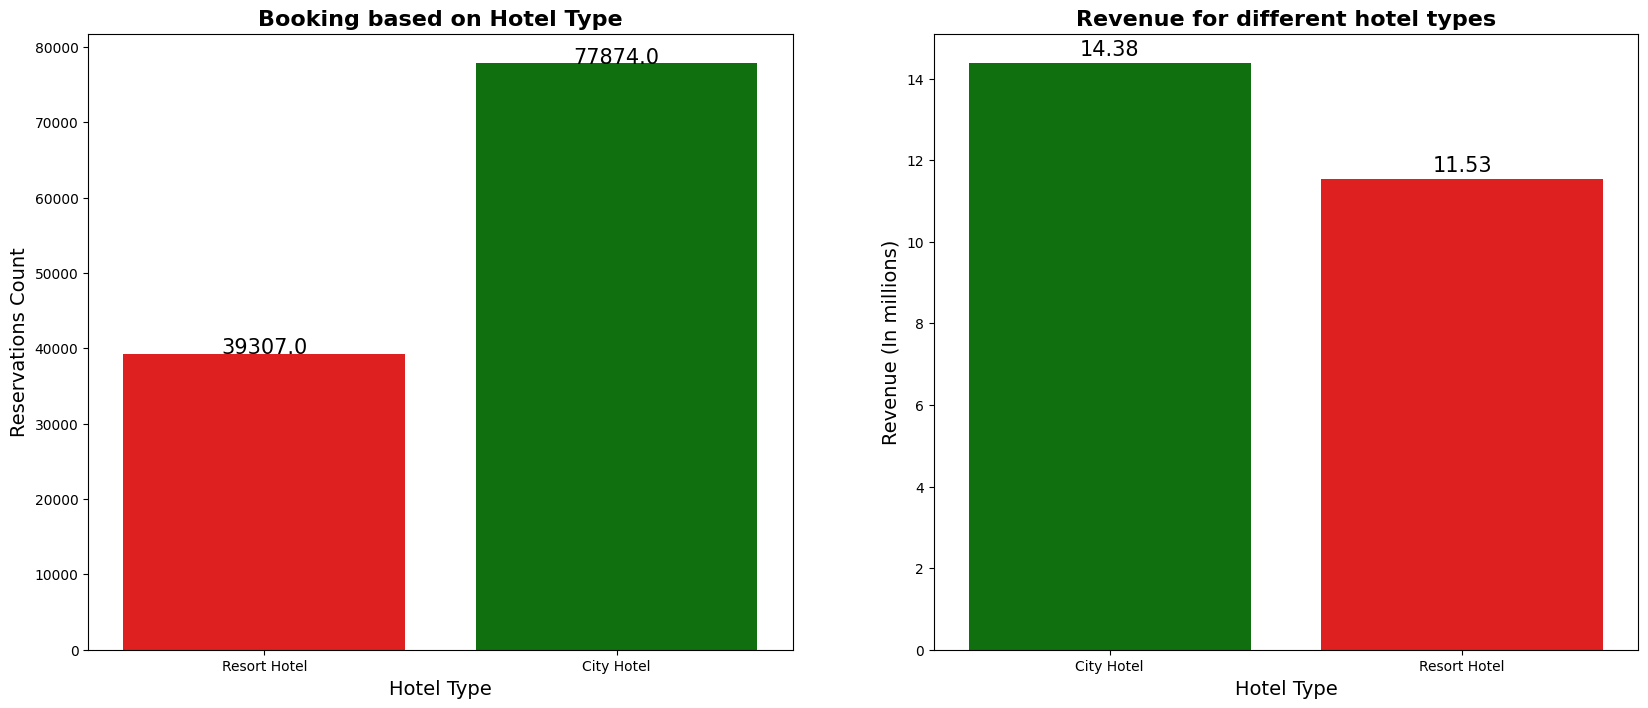

In [34]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(20, 8))

# This graph shows the reservations made in both type of hotels- 'Resort Hotel','City Hotel'.
ax = sns.countplot(ax=axes[0], data=new_df, x='hotel',palette=['red', 'green'])
ax.set_title('Booking based on Hotel Type',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Hotel Type', fontsize = 14)
ax.set_ylabel('Reservations Count', fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.40,rect.get_height(),horizontalalignment='center', fontsize = 15)

#This graph shows price distribution for hotel type
revenue_hotel=actual_guests.groupby('hotel')['revenue'].sum().reset_index().round(2)
ax = sns.barplot(ax=axes[1], x='hotel', y='revenue', data=revenue_hotel,palette=['green', 'red'])
ax.set_title('Revenue for different hotel types',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Revenue (In millions)',fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

In [35]:
new_df_lead=new_df.groupby(['arrival_date_month','hotel'])['lead_time'].mean().astype(int).reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# It will take the order of the month list in the df along with values
new_df_lead['arrival_date_month']=pd.Categorical(new_df_lead['arrival_date_month'],categories=months,ordered=True)
new_df['arrival_date_month']=pd.Categorical(new_df['arrival_date_month'],categories=months,ordered=True)
#sorting
new_df_lead=new_df_lead.sort_values('arrival_date_month')

Text(0, 0.5, 'Booking count')

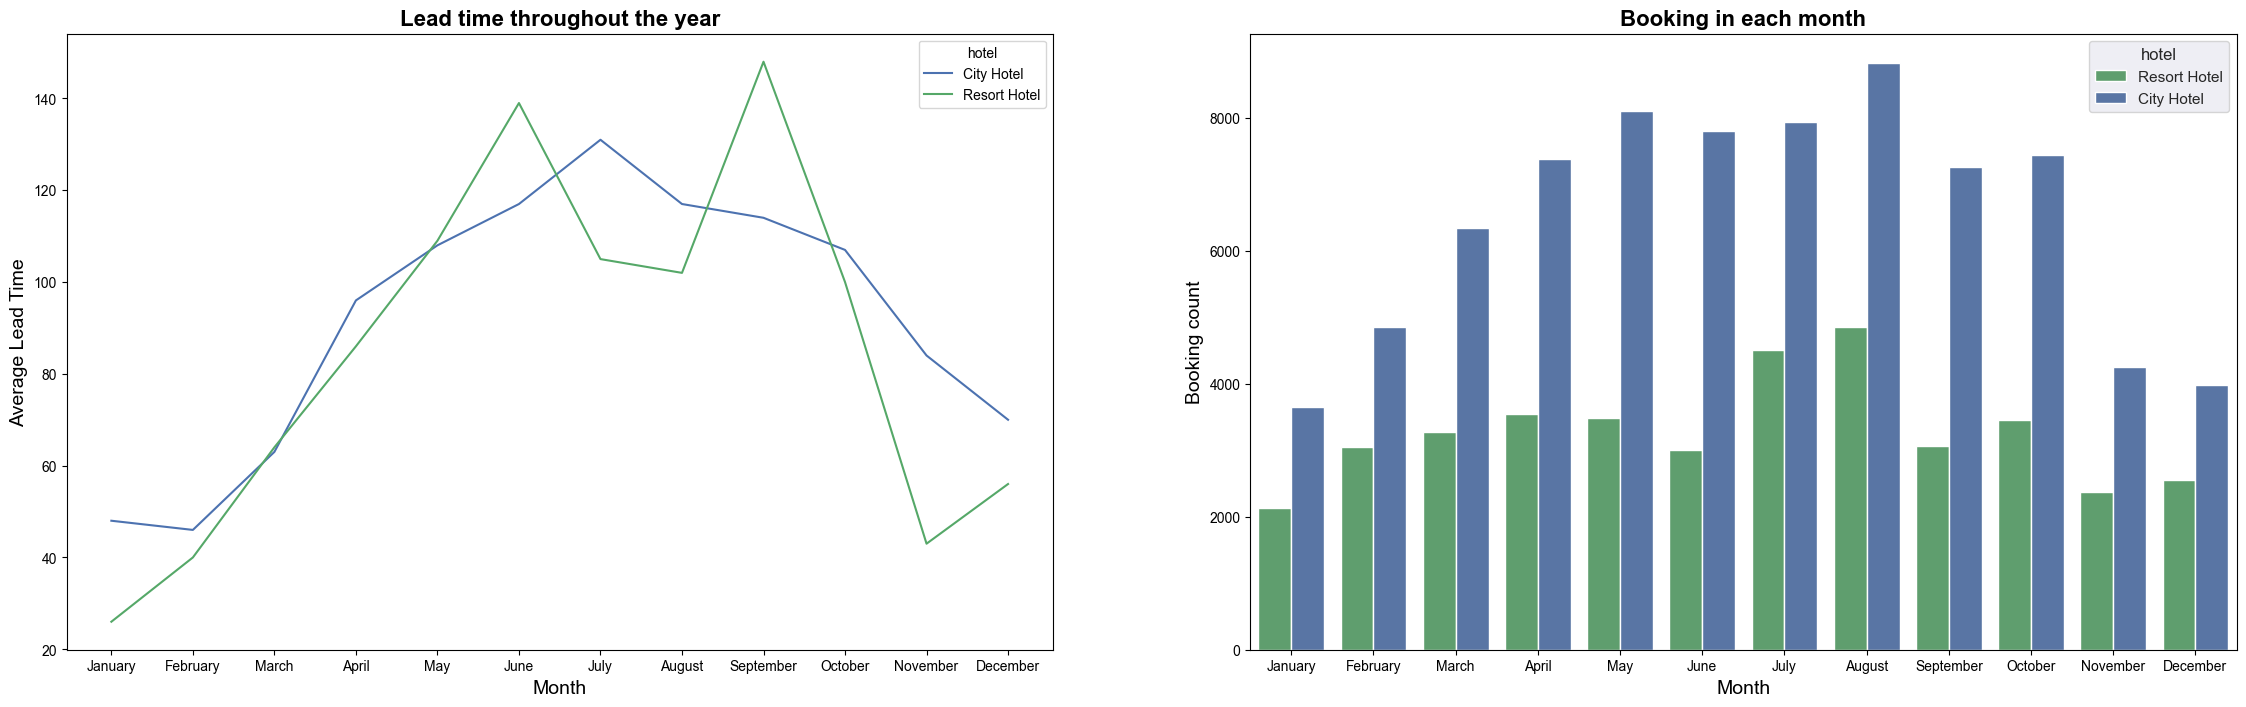

In [36]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(28, 8))

ax = sns.lineplot(ax=axes[0], data=new_df_lead, x=new_df_lead['arrival_date_month'], y=new_df_lead['lead_time'],hue=new_df_lead['hotel'],palette=['b','g'])
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title('Lead time throughout the year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Average Lead Time', fontsize = 14)

ax = sns.countplot(ax=axes[1], data=new_df, x=new_df['arrival_date_month'], hue=new_df['hotel'],palette=['g','b'])
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title('Booking in each month',fontsize = 16, fontweight='bold')
ax.set_xlabel('Month',fontsize = 14)
ax.set_ylabel('Booking count',fontsize = 14)

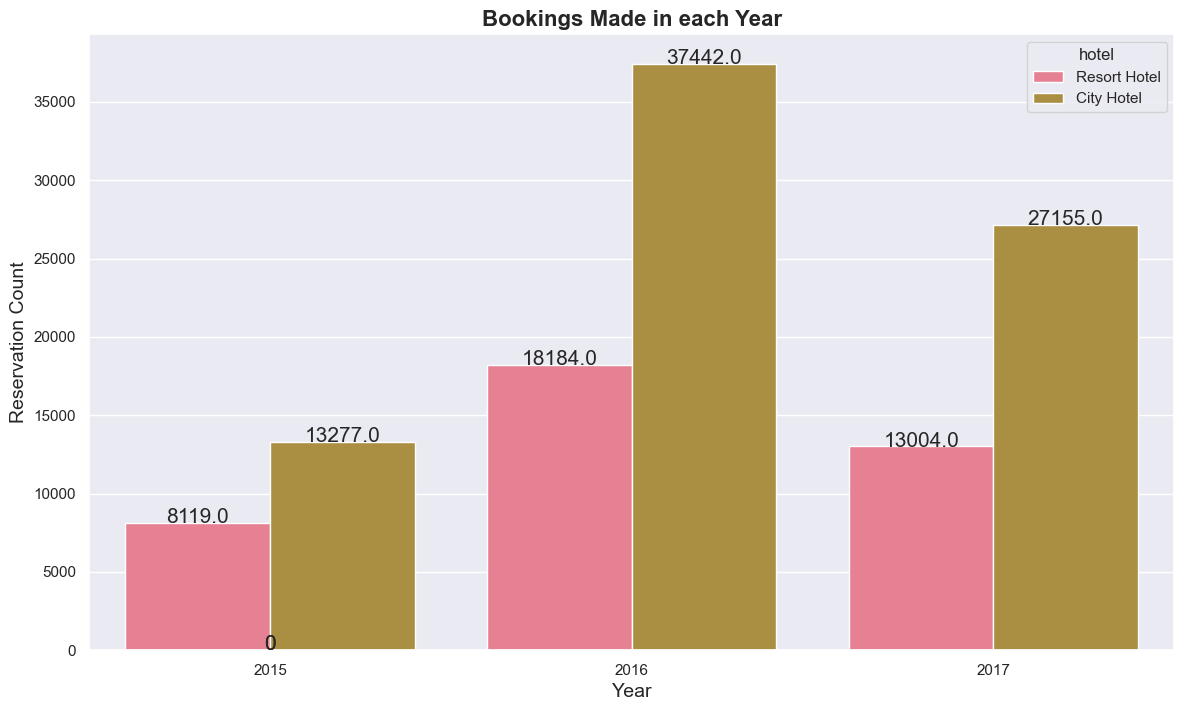

In [37]:
#Reservations Made in each Year
# This graph shows the booking made in each month for different hotel types.
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("husl")
ax = sns.countplot(x = 'arrival_date_year',hue='hotel', data=new_df)
ax.set_title('Bookings Made in each Year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Reservation Count',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\866928517.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


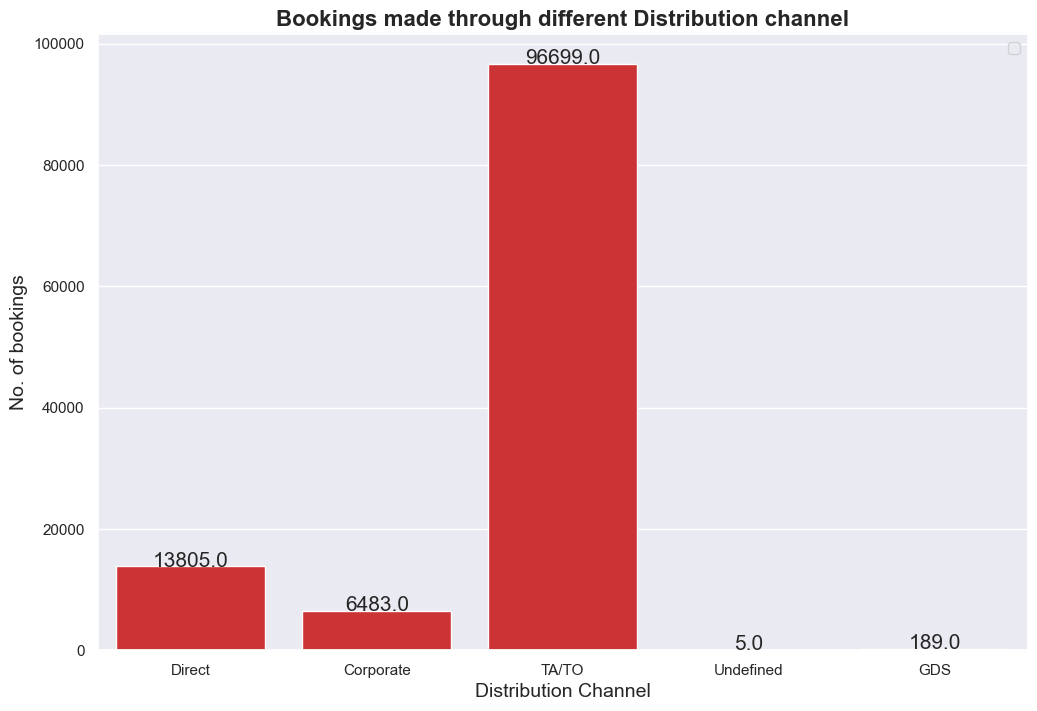

In [38]:
#It seems that 2016 to be year where the hotel bookings are highest.
#Bookings made by different Distribution channel
# This graph shows reservations made by different distribution channel.
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='distribution_channel', data=new_df)
ax.set_title('Bookings made through different Distribution channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('No. of bookings',fontsize = 14)
plt.legend(loc='upper right')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

Text(0.5, 1.0, 'Percentage share of customer type')

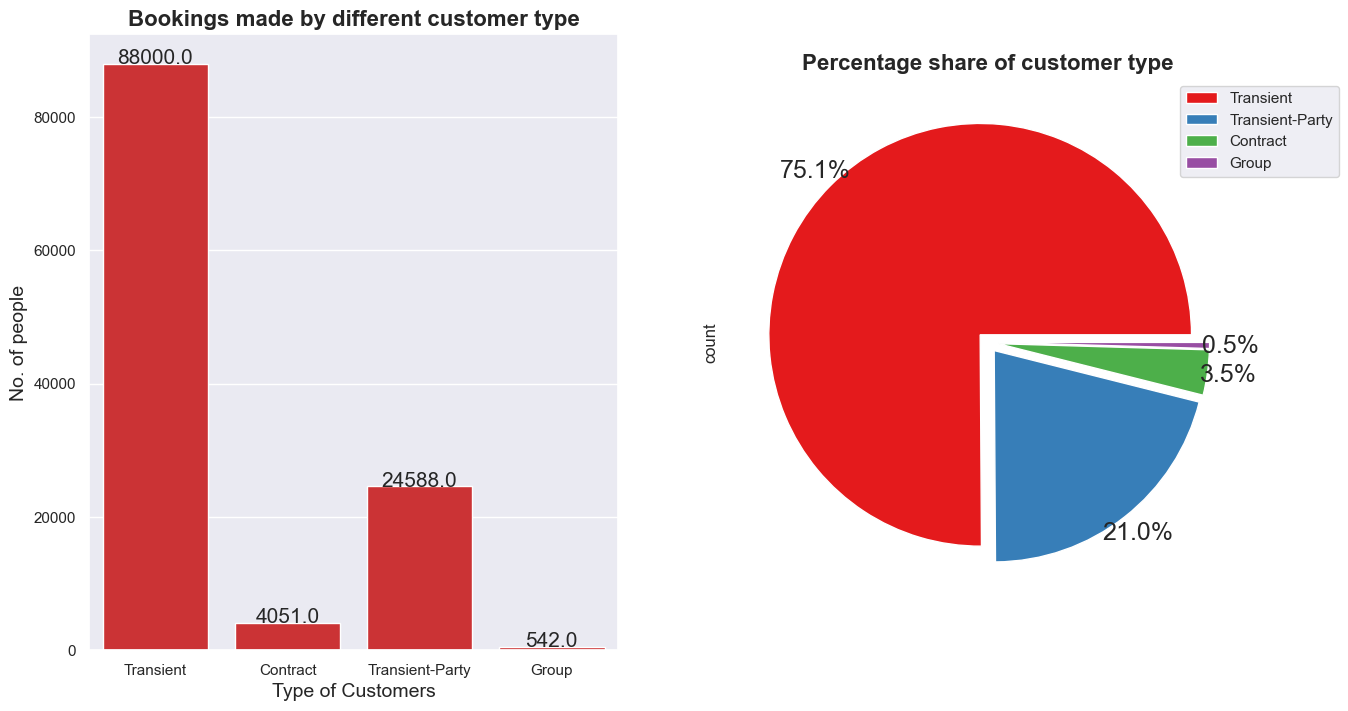

In [39]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
ax = sns.countplot(ax=axes[0],x='customer_type', data=new_df)
ax.set_title('Bookings made by different customer type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Type of Customers',fontsize = 14)
ax.set_ylabel('No. of people',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

ax=axes[1],new_df['customer_type'].value_counts().plot.pie(explode=[0.05]*4, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['customer_type'].value_counts().index.tolist())
plt.title('Percentage share of customer type',fontsize = 16, fontweight='bold')

In [40]:
room_price=new_df.groupby('reserved_room_type')['adr'].mean().astype(int).reset_index().sort_values(by='adr',ascending=True)
hotel_room = new_df.groupby('reserved_room_type')['hotel'].count().astype(int).reset_index().sort_values(by='hotel',ascending=False)

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\2246493379.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


Text(0, 0.5, 'ADR')

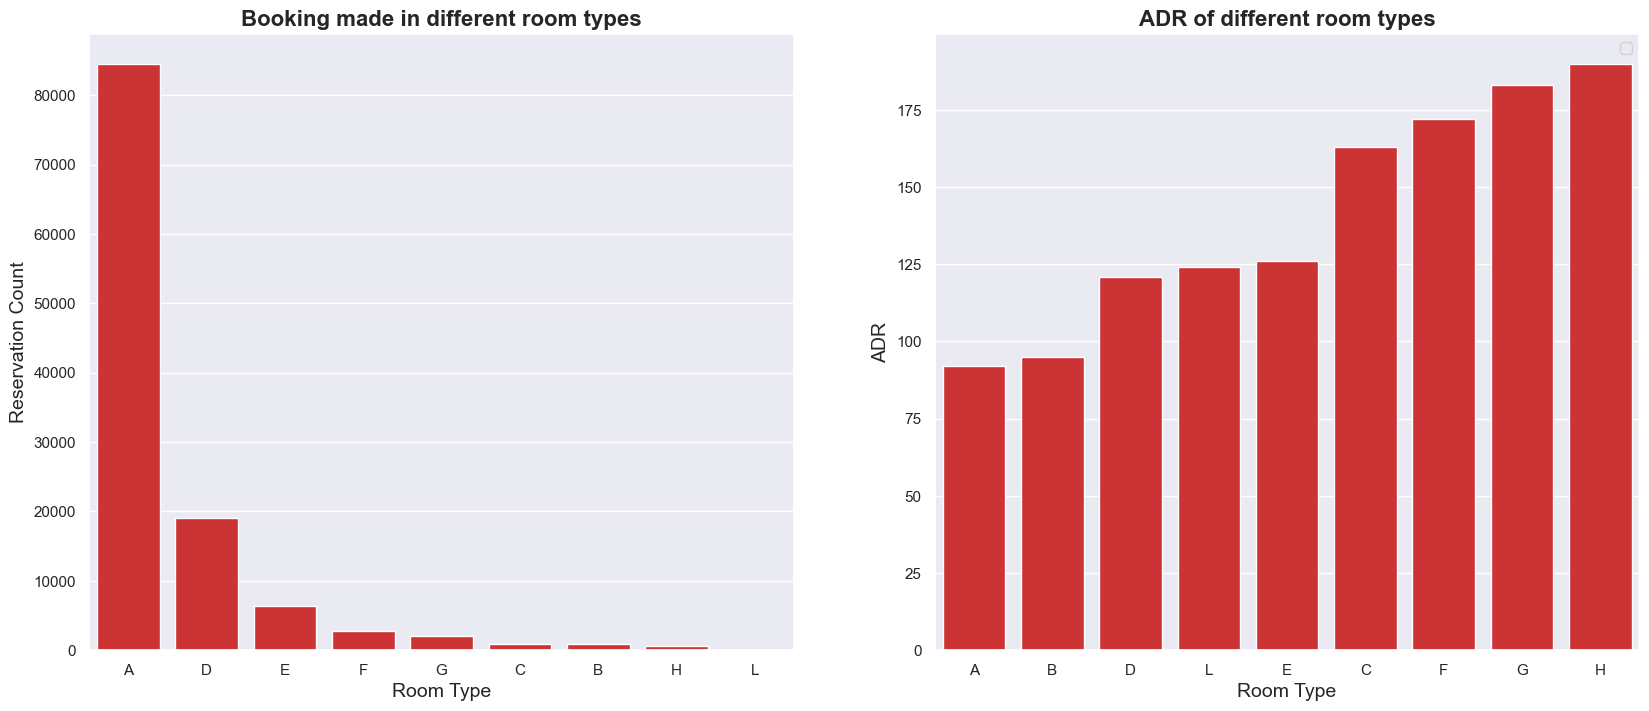

In [41]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(20, 8))

# The graph shows reservation made on different room types
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.barplot(ax=axes[0],x='reserved_room_type',y='hotel',data=hotel_room)
graph.set_title('Booking made in different room types',fontsize = 16, fontweight='bold')
graph.set_xlabel('Room Type',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.barplot(ax=axes[1],x='reserved_room_type', y='adr',data=room_price)
graph.set_title('ADR of different room types',fontsize = 16, fontweight='bold')
graph.set_xlabel('Room Type',fontsize = 14)
graph.set_ylabel('ADR',fontsize = 14)

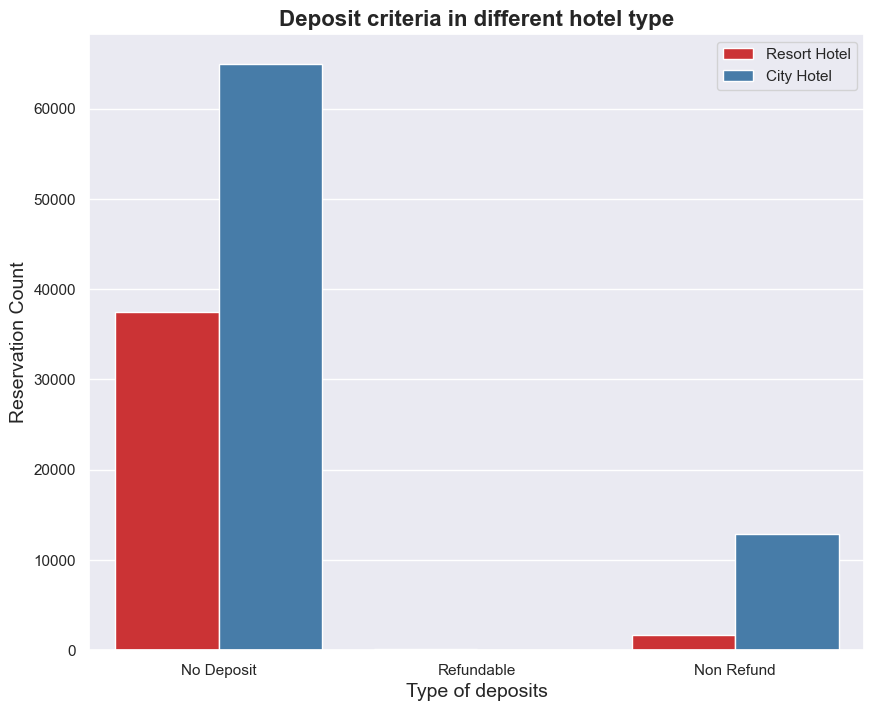

In [42]:
#Bookings based on deposit type
# This graph shows Deposit type in different hotel type.
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.countplot(hue=new_df['hotel'],x=new_df['deposit_type'])
graph.set_title('Deposit criteria in different hotel type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Type of deposits',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

In [43]:
#Analysis based on Cancellation
#Cancellation made in each hotel type
# Using .loc() property for single condition.
# Creating a new conditional column where there is cancellation.
new_df.loc[(new_df['is_canceled']==1), 'is_canceled'] = "Cancellation"


C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\799677848.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cancellation' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df['is_canceled']==1), 'is_canceled'] = "Cancellation"


In [44]:
cancellation = new_df.loc[new_df["is_canceled"] =='Cancellation']

C:\Users\Gauri\AppData\Local\Temp\ipykernel_11932\361442840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(ax=axes[0],x ='hotel', data=cancellation, palette=['red', 'green'])


Text(0.5, 1.0, '% of cancellations made in each Hotel Type')

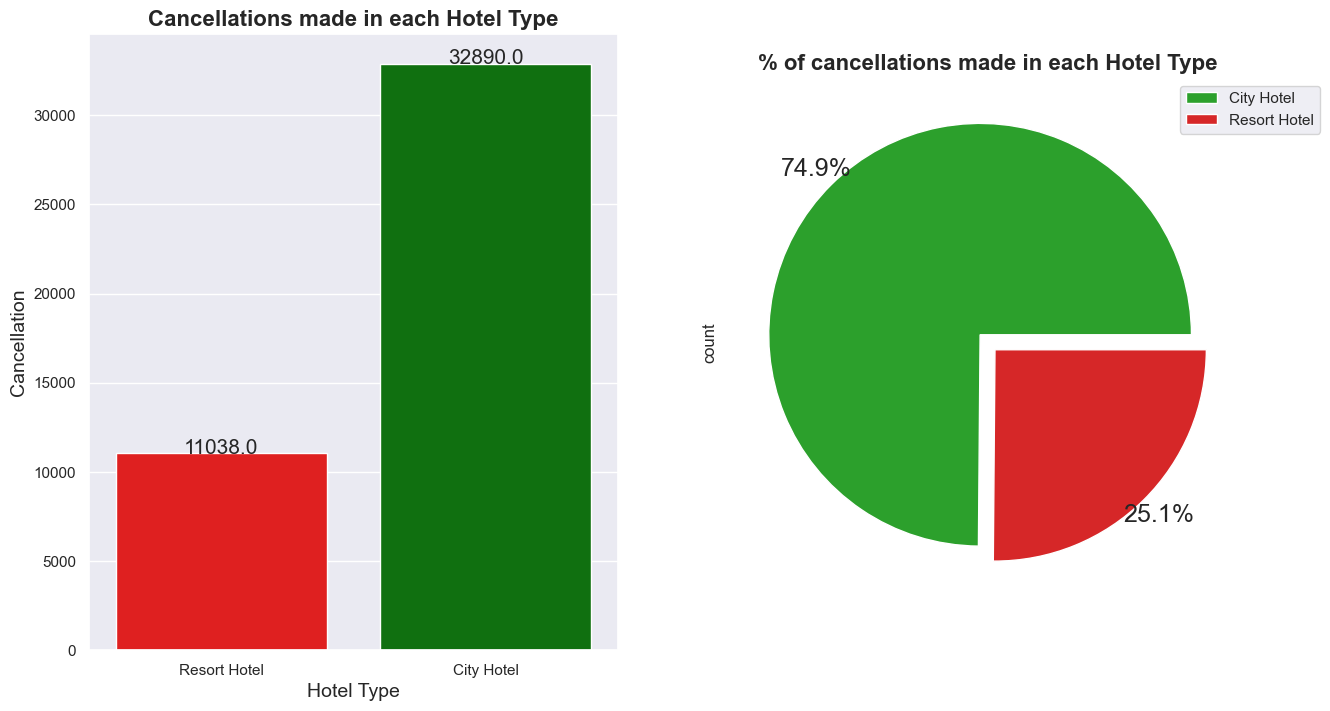

In [45]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

# This graph shows cancellations made in different hotel types.
ax = sns.countplot(ax=axes[0],x ='hotel', data=cancellation, palette=['red', 'green'])
sns.set(rc={'figure.figsize':(12,8)})
ax.set_title('Cancellations made in each Hotel Type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

ax=axes[1],cancellation['hotel'].value_counts().plot.pie(explode=[0.05]*2, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None,colors=['tab:green','tab:red'])
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['hotel'].value_counts().index.tolist())
plt.title('% of cancellations made in each Hotel Type',fontsize = 16, fontweight='bold')

In [46]:
#Cancellation is less in Resort hotels as compared to City hotels.
#Cancellation rate is 75% in City hotels as compared to 25% in Resort hotels.

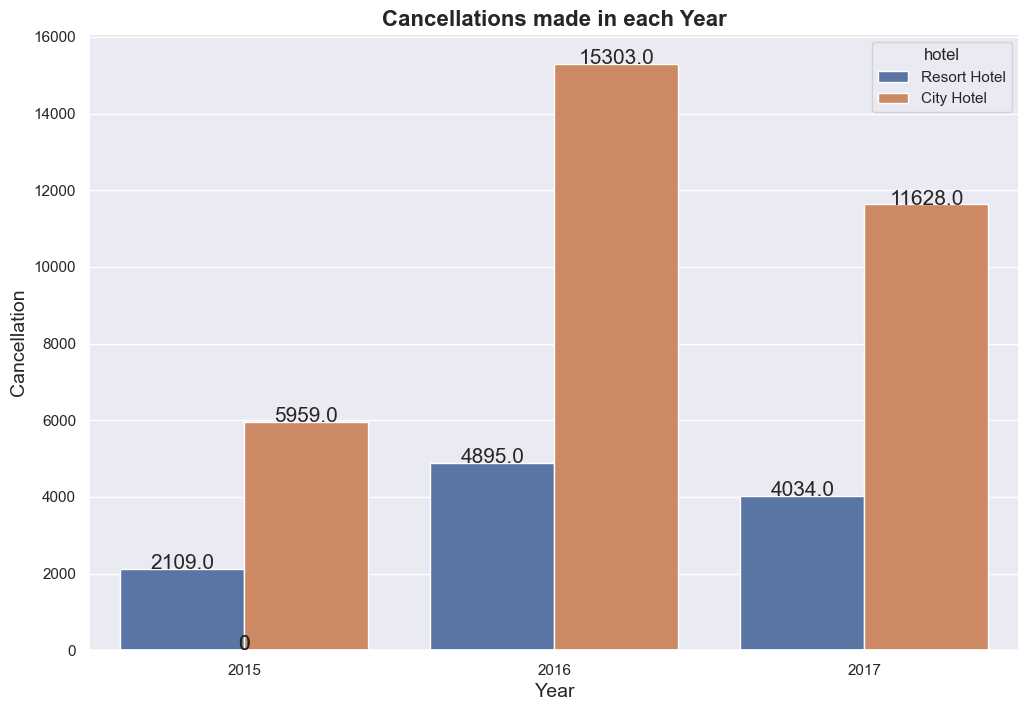

In [47]:
#Cancellations made in each Year
ax = sns.countplot(x ='arrival_date_year',hue='hotel',data=cancellation)
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("husl")
ax.set_title('Cancellations made in each Year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

In [48]:
#We can see maximum cancellations were done in the year 2016 in both the hotel types.
#Every year there is 25-30% cancellation for resort hotels and 40-45% cancellation for city hotels.

Text(0, 0.5, 'Cancellation')

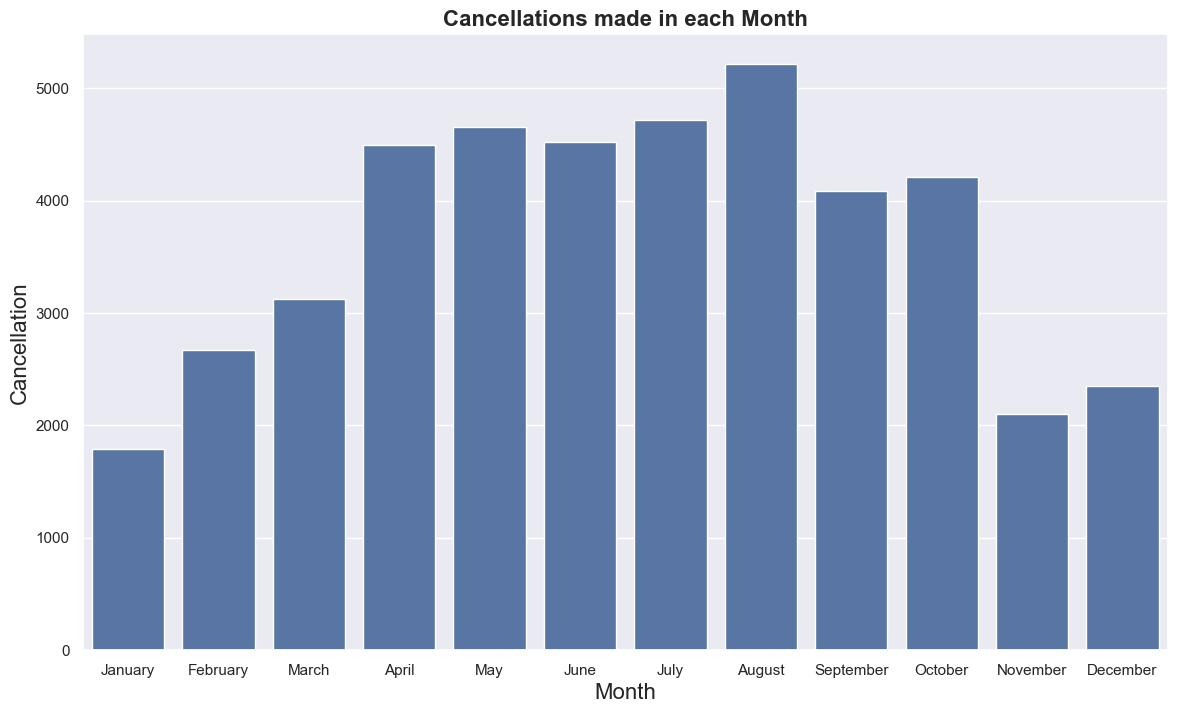

In [49]:
#Cancellations made in each months
# This graph shows cancellations made in each month
sns.set(rc={'figure.figsize':(14,8)})
graph = sns.countplot(x ='arrival_date_month', data=cancellation)
graph.set_title('Cancellations made in each Month',fontsize = 16, fontweight='bold')
graph.set_xlabel('Month',fontsize = 16)
graph.set_ylabel('Cancellation',fontsize = 16)

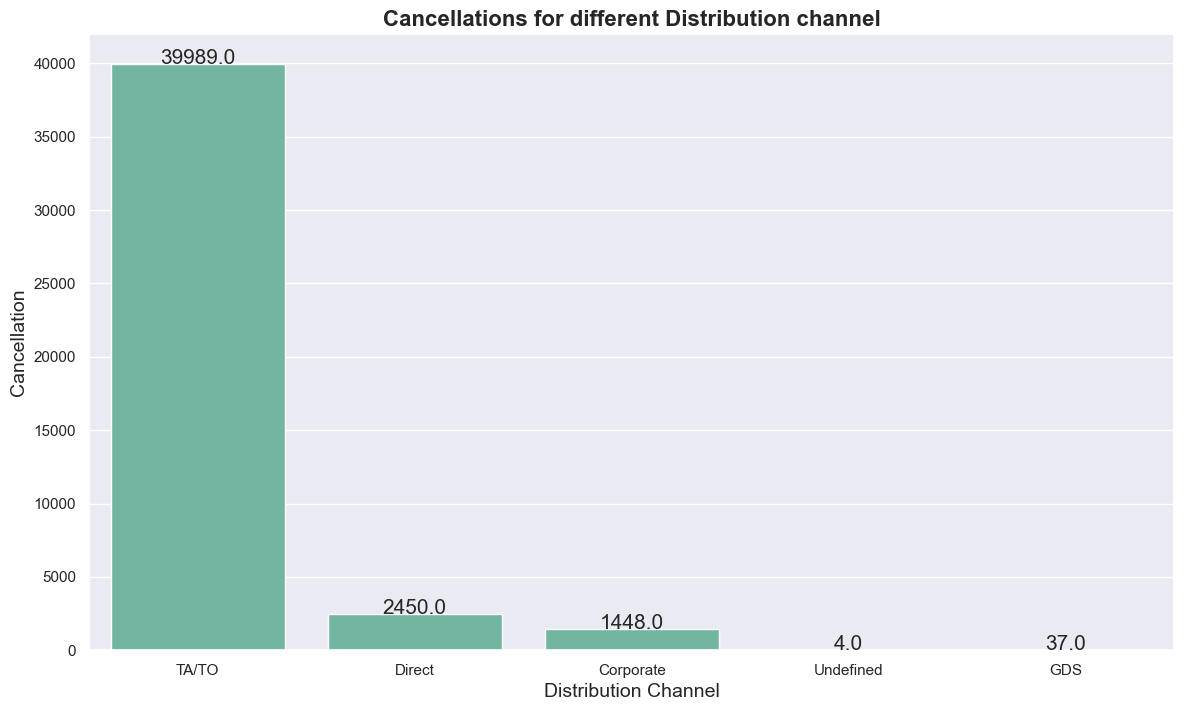

In [50]:
#Cancellations for different distribution channel.
# The graph shows cancellations for different distribution channel
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("Set2")
ax = sns.countplot(x = 'distribution_channel', data=cancellation)
ax.set_title('Cancellations for different Distribution channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

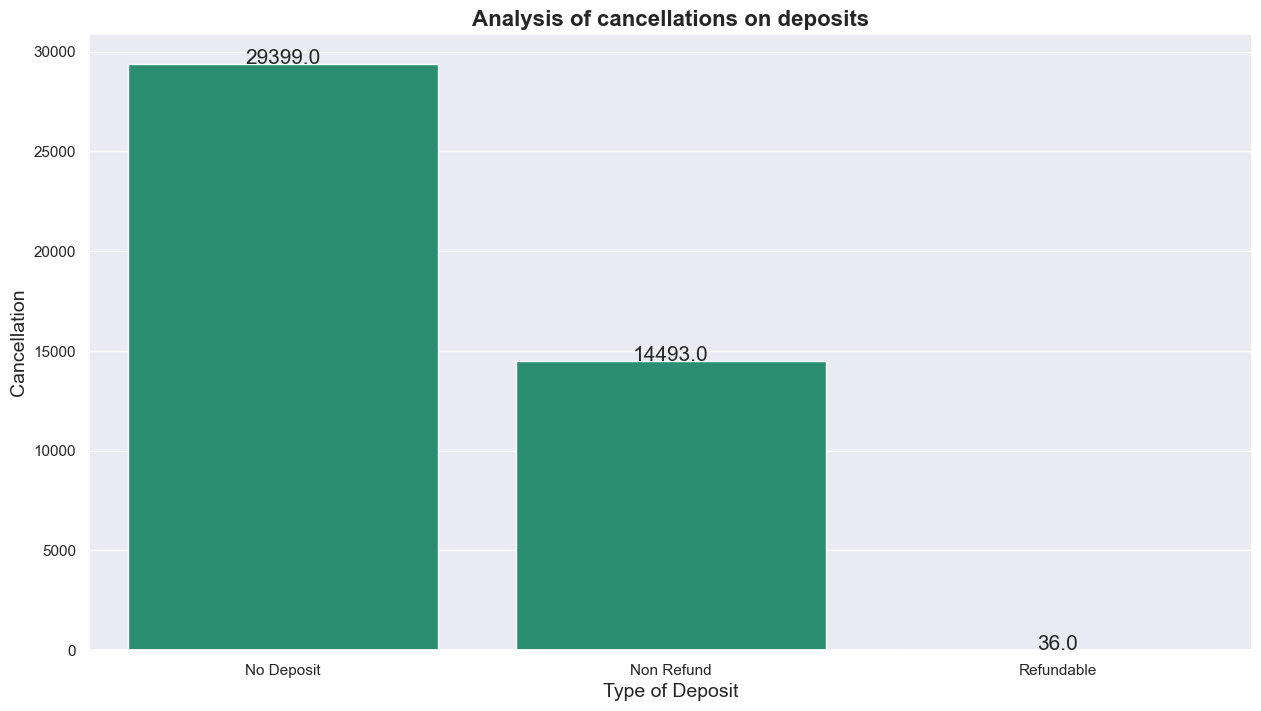

In [51]:
#Analysis of cancellations on deposits
# This graph shows cancellations made due to deposits.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
ax = sns.countplot(x = 'deposit_type', data=cancellation)
ax.set_title('Analysis of cancellations on deposits',fontsize = 16, fontweight='bold')
ax.set_xlabel('Type of Deposit',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

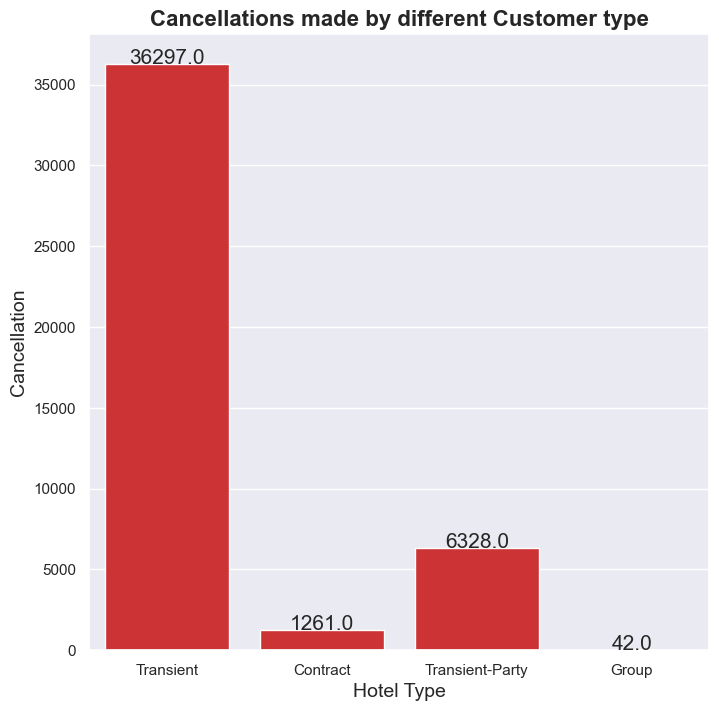

In [52]:
#Cancellation based on customer type
# This graph shows the cancellation made by differnt customer type.
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='customer_type',data=cancellation)
ax.set_title('Cancellations made by different Customer type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

In [61]:
#Transient customers cancels more often but when people book in group it leads to lesser cancellations.